In [28]:
# for data wrangling
import pandas as pd
from pandas import json_normalize

# for stats
import numpy as np
import statistics
import math
from scipy.stats import pearsonr

# for visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# for regex
import re

#### Main Experiment

In [29]:
data = pd.read_csv('topics-post-RADAR-data.csv')

In [30]:
data.columns

Index(['id', 'File', 'Topic', 'Student', 'Student_Reformatted',
       'Grammarly_Score', 'STUD_Grammarly_Red', 'STUD_Grammarly_All',
       'ChatGPT-3', 'ChatGPT-4', 'GPT-4_Paraphrasing.io',
       'GPT-4_Paraphrasing.io_MANUALLYCORRECTED', 'GPT-4_Quillbot',
       'GPT-4_Grammarly', 'GPT-4_WordAi', 'STUD_sent_count', 'GPT3_sent_count',
       'GPT4_sent_count', 'STUD_word_count', 'GPT3_word_count',
       'GPT4_word_count', 'STUD_RADAR', 'STUD_REFORMATTED', 'STUD_RED_RADAR',
       'STUD_ALL_RADAR', 'GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR',
       'GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR',
       'GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR'],
      dtype='object')

In [31]:
melted_data = pd.melt(data, id_vars=[
    'id', 'File', 'Topic', 'Student', 'ChatGPT-3', 'ChatGPT-4', 'Student_Reformatted',
       'Grammarly_Score', 'STUD_Grammarly_Red', 'STUD_Grammarly_All',
       'GPT-4_Paraphrasing.io', 'GPT-4_Paraphrasing.io_MANUALLYCORRECTED',
       'GPT-4_Quillbot', 'GPT-4_Grammarly', 'GPT-4_WordAi', 
       'STUD_sent_count', 'GPT3_sent_count', 'GPT4_sent_count',
       'STUD_word_count', 'GPT3_word_count', 'GPT4_word_count'], 
       var_name='Category', value_name='RADAR_output')

In [32]:
melted_data.head(1)

,id,File,Topic,Student,ChatGPT-3,ChatGPT-4,Student_Reformatted,Grammarly_Score,STUD_Grammarly_Red,STUD_Grammarly_All,...,GPT-4_Grammarly,GPT-4_WordAi,STUD_sent_count,GPT3_sent_count,GPT4_sent_count,STUD_word_count,GPT3_word_count,GPT4_word_count,Category,RADAR_output
0,0,essay01.txt,Should students be taught to compete or to coo...,It is always said that competition can effecti...,Education is not only about acquiring knowledg...,Title: Fostering Cooperation and Competition i...,It is always said that competition can effecti...,75,It is always said that competition can effecti...,It is always said that competition can effecti...,...,Title: Fostering Cooperation and Competition i...,Title of Article: Promoting Cooperation and Co...,16,12,12,367,258,215,STUD_RADAR,0.57065


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

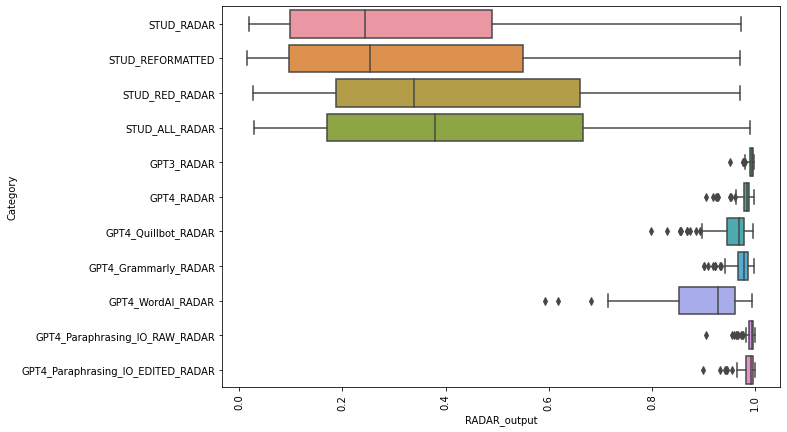

In [77]:
plt.figure(figsize=(10, 7)) 
g = sns.boxplot(data=melted_data, x='RADAR_output', y='Category')
plt.xticks(rotation=90)
# g.set(xticklabels=['Human', 'GPT3', 'GPT4', 'Quillbot', 'Grammarly', 'WordAI', 'Para Raw', 'Para Edited']) 


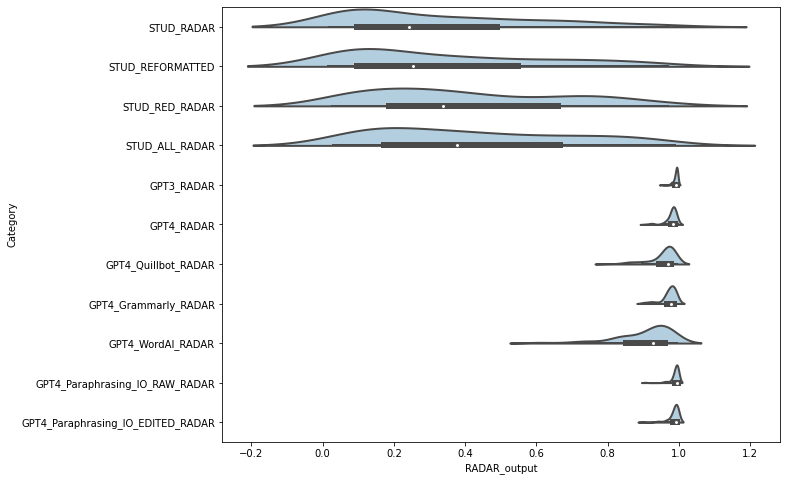

In [84]:
plt.figure(figsize=(10, 8)) 
ax = sns.violinplot(data=melted_data, x='RADAR_output', y='Category', hue=True, 
                    hue_order=[True, False], split=True, orient='h', palette="Blues",
                    linewidth=2, width=0.9)
ax.legend_.remove() 


#### Does Text Length Impact RADAR False Positive Rate?

In [7]:
text_length_RADAR = pd.read_csv('topics-length-specific-RADAR.csv')

In [14]:
text_length_RADAR.head(4)

,text_id,pre_processed_text,paragraph_id,word_count,RADAR_outputs
0,0,It is always said that competition can effecti...,0,84,0.996356
1,0,It is always said that competition can effecti...,1,189,0.983723
2,0,It is always said that competition can effecti...,2,333,0.848712
3,0,It is always said that competition can effecti...,3,369,0.570650


(-0.5, 4.5)

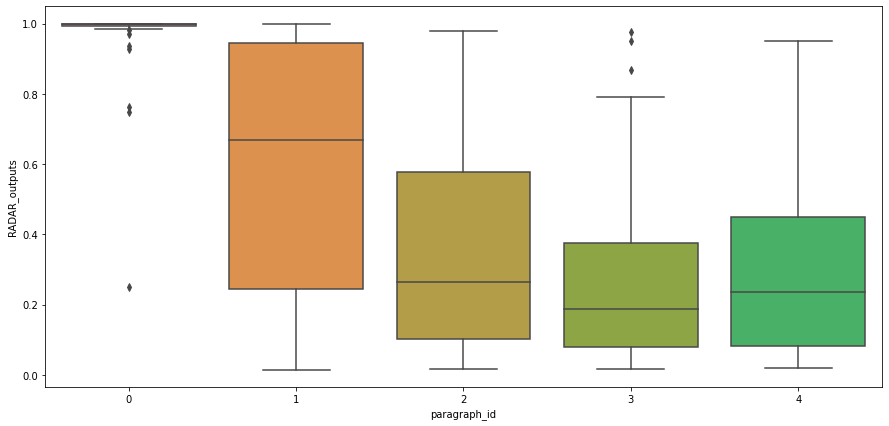

In [26]:
plt.figure(figsize=(15, 7)) 
f = sns.boxplot(data=text_length_RADAR, y='RADAR_outputs', x='paragraph_id')
plt.xlim(-0.5,4.5)

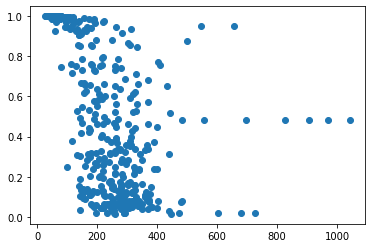

In [12]:
plt.scatter(x=text_length_RADAR['word_count'], y=text_length_RADAR['RADAR_outputs'])

In [11]:
# Perform Pearson correlation test
corr_coeff, p_value = pearsonr(text_length_RADAR['word_count'], text_length_RADAR['RADAR_outputs'])

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Pearson correlation coefficient: -0.5404030537642683
p-value: 3.8354396258969e-33
